<a href="https://colab.research.google.com/github/davidwhogg/AbundanceSelfCal/blob/master/for_apw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A shot at a simple parameterization for vertical dynamics

In [ ]:
import jax.numpy as jnp
from jax import grad, vmap
import pylab as plt

In [ ]:
# Hard code some functions and parameters, inspired by Hogg's intuitions
def omega(A):
    return 1. / (1. + 0.5 * A)
def epsilon(A):
    return 0.01 * A ** 2

In [ ]:
# Make kinematic functions
# CHECK OUT THE 3. It's duh, but only after a lot of not-duh.
def z(t, A):
    w = omega(A)
    return A * jnp.sin(w * t) + A * epsilon(A) * jnp.sin(3 * w * t)
v = grad(z)
zs = vmap(z, in_axes=(0, None))
vs = vmap(v, in_axes=(0, None))

Text(0, 0.5, 'height $z$')

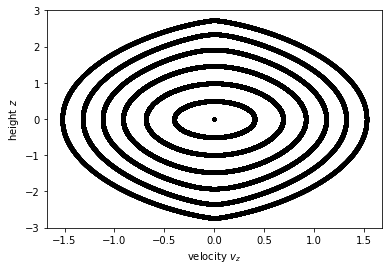

In [ ]:
# Plot some orbits
theta_zs = 2. * jnp.pi * jnp.arange(0., 1., 0.0001)
for A in jnp.arange(0., 3.1, 0.5):
    ts = theta_zs / omega(A)
    plt.plot(vs(ts, A), zs(ts, A), "k.")
plt.xlabel("velocity $v_z$")
plt.ylabel("height $z$")